# Plotting Trend of  GDP

## 1. Import necessary packages

In [1]:
import numpy as np
import statsmodels.tsa.arima_model as smta
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import read_excel
import seaborn as sns
import statsmodels.api as sm

## 2. Read data

In [2]:
excel_data= read_excel('국내총생산에_대한_지출_원계열__실질__연간__20190408.xlsx', '데이터')
excel_data

,"국내총생산에 대한 지출(원계열, 실질, 분기 및 연간)별",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,최종소비지출,37461.46,38246.23,41674.98,43557.03,46852.54,50060.97,53596.7,58328.58,64490.41,...,7.863318e+05,8.198212e+05,8.423393e+05,8.612588e+05,8.801301e+05,8.981094e+05,9.195310e+05,9.469436e+05,9.734838e+05,1.007610e+06
1,민간,27911.11,28559.84,31342.96,32701.67,35495.78,37937.74,40435.02,43973.15,48611.42,...,6.099973e+05,6.367127e+05,6.551811e+05,6.677812e+05,6.803495e+05,6.922360e+05,7.074927e+05,7.253623e+05,7.442844e+05,7.654174e+05
2,가계,-,-,-,-,-,-,-,-,-,...,5.894673e+05,6.152280e+05,6.319839e+05,6.397817e+05,6.484289e+05,6.592392e+05,6.737208e+05,6.898611e+05,7.084957e+05,7.279972e+05
3,가계에 봉사하는 비영리단체,-,-,-,-,-,-,-,-,-,...,2.053020e+04,2.148470e+04,2.319720e+04,2.800200e+04,3.194180e+04,3.302200e+04,3.379790e+04,3.552710e+04,3.581800e+04,3.744920e+04
4,정부,11188.27,11269.19,11724.24,12383.75,12394.08,13203.31,14727.03,16121.15,17844.9,...,1.763234e+05,1.831085e+05,1.871582e+05,1.934735e+05,1.997834e+05,2.058692e+05,2.120216e+05,2.215142e+05,2.291007e+05,2.419194e+05
5,총자본형성,2201.96,2887.9,2876.05,4523.14,3893.94,3920.48,6491.12,7803.97,11047.87,...,3.438402e+05,4.051880e+05,4.192827e+05,4.096399e+05,4.091538e+05,4.306855e+05,4.621143e+05,4.880399e+05,5.373700e+05,5.271955e+05
6,총고정자본형성,1618.23,1726.95,2237.39,2806.3,2632.07,3391.63,5347.84,6747.84,9448.18,...,3.657462e+05,3.859236e+05,3.891244e+05,3.872397e+05,4.000260e+05,4.134875e+05,4.343807e+05,4.588314e+05,4.984759e+05,4.872972e+05
7,총고정자본형성(민간),-,-,-,-,-,-,-,-,-,...,2.891350e+05,3.198751e+05,3.264306e+05,3.259536e+05,3.376345e+05,3.545351e+05,3.729375e+05,3.928664e+05,4.288856e+05,4.169158e+05
8,총고정자본형성(정부),-,-,-,-,-,-,-,-,-,...,7.682110e+04,6.604850e+04,6.269380e+04,6.130210e+04,6.242550e+04,5.914170e+04,6.166170e+04,6.615220e+04,6.987770e+04,7.055270e+04
9,건설투자,1801.08,1976.6,2495.98,3053.76,3184.66,4144.98,5234.56,6383.26,9176.44,...,2.082406e+05,2.006183e+05,1.937523e+05,1.861076e+05,1.963303e+05,1.984567e+05,2.115364e+05,2.333653e+05,2.510784e+05,2.409963e+05


## 3. Extract level data and calculate growth rates

In [3]:
# The type of these data is Series.
gdpl=excel_data.iloc[-1,1:]
gdp=gdpl.pct_change(periods=1)
gdp=100*gdp

## 4. OLS estimation

In [4]:
# 1961-2018
y=gdp[1:]
ss=len(y)
tr = np.arange(1,ss+1)
trs= tr*tr
tt = np.vstack((tr,trs))
model=sm.OLS(y,sm.add_constant(tt.T))
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     24   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2.105
Date:                Thu, 05 Oct 2023   Prob (F-statistic):              0.132
Time:                        19:37:53   Log-Likelihood:                -209.80
No. Observations:                  58   AIC:                             425.6
Df Residuals:                      55   BIC:                             431.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7858      3.774      2.858      0.0

## 5. Plot GDP grwoth rates and its trend

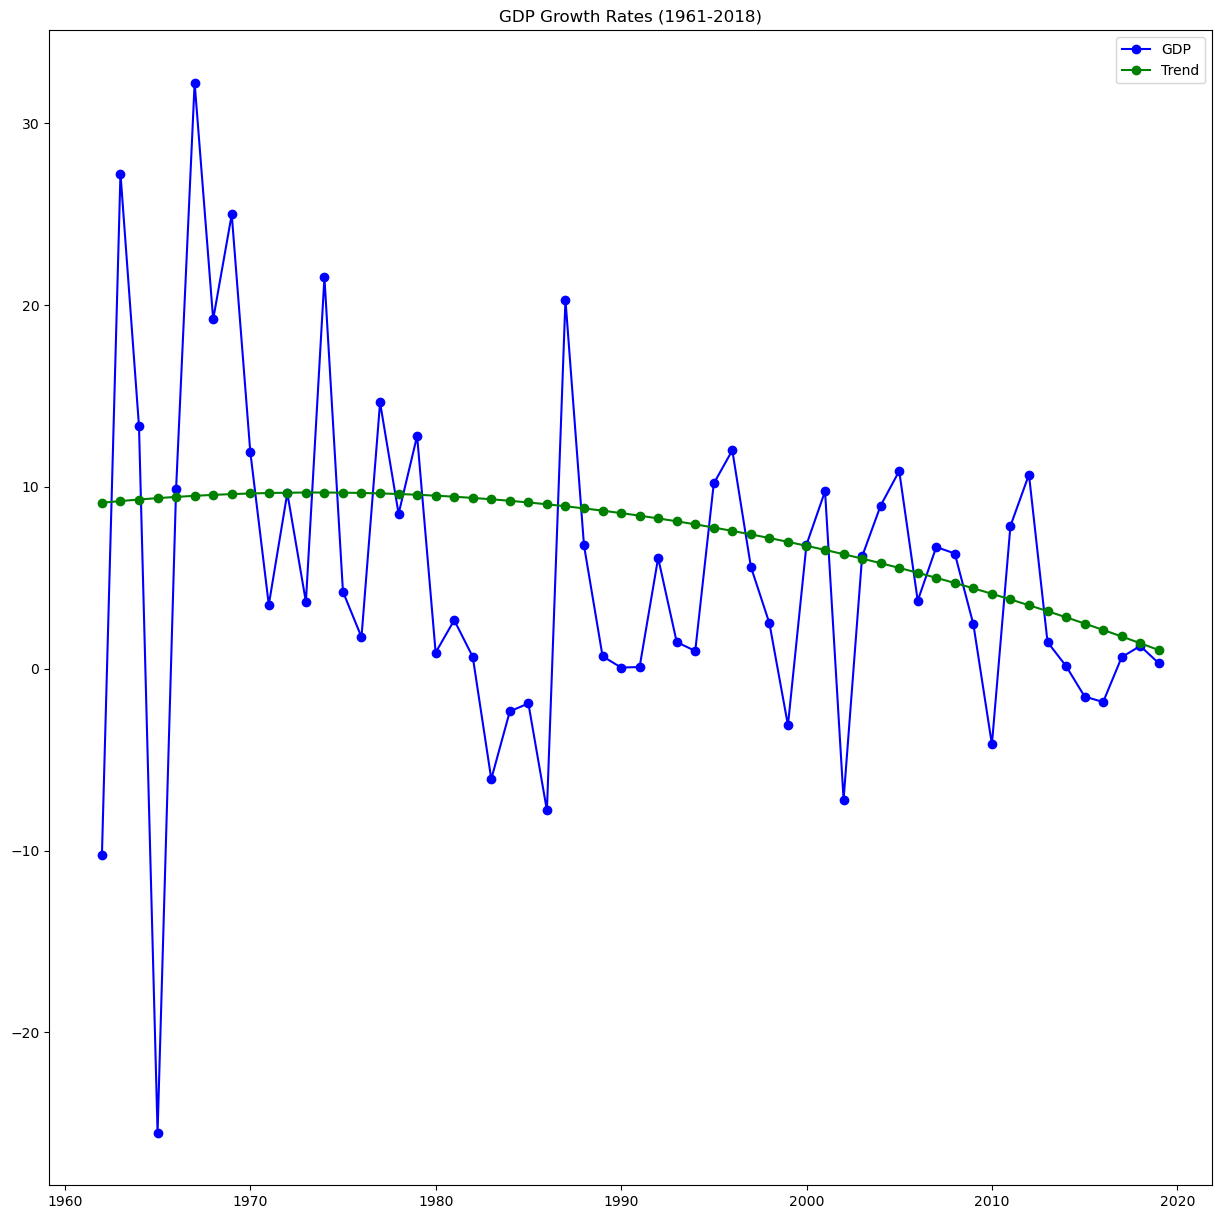

In [5]:
qtrnd=np.ones(58)
a=np.arange(0,58)
for i in a:
    qtrnd[i]=9.0267+0.1057*(i+1)-0.0042*(i+1)*(i+1)

dates = pd.date_range('1961', periods=58, freq='A')
plt.figure(figsize=(15,15))
p1=plt.plot(dates,gdp[1:],'bo-')
p2=plt.plot(dates,qtrnd,'go-')
plt.legend((p1[0], p2[0]), ('GDP', 'Trend'))
plt.title('GDP Growth Rates (1961-2018)')
plt.savefig('gdp_trend.pdf')
plt.show()
